# MEMBUAT MODEL MESIN LEARNING UNTUK MEMPREDIKSI MODEL SISWA

Tujuan: Memprediksi nilai akhir siswa (G3) berdasarkan berbagai fitur demografis, sosial, dan pendidikan.

Student Performance Dataset

Sumber: UCI Machine Learning Repository

Format: CSV

Deskripsi: Data tentang performa siswa di Portugal. Berisi informasi seperti gender, absensi, waktu belajar, dan nilai akhir.

Link Unduh Langsung: https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

## Data Preparation

### Memuat Dataset

Memuat data dari file CSV ke dalam Pandas DataFrame untuk mempermudah manipulasi dan analisis data.
Parameter:
sep=';': Menentukan pemisah kolom sebagai titik koma, karena dataset UCI Student Performance menggunakan format ini.
quotechar='"': Mengelola data yang berada di dalam tanda kutip ganda, sehingga teks dalam tanda kutip tidak terpotong.
Hasil: Data dari file CSV dimuat ke dalam variabel df sebagai Pandas DataFrame.


In [1]:
import pandas as pd

# Mengunggah file CSV ke Google Colab
from google.colab import files
uploaded = files.upload()

# Menyebutkan nama file CSV yang telah diunggah
file_name = list(uploaded.keys())[0]

# Memuat dataset ke dalam DataFrame
df = pd.read_csv(file_name, sep=';', quotechar='"')

# Memeriksa struktur dataset
print("Info Dataset:")
print(df.info())
print("\nData Awal:")
print(df.head())



Saving student-por.csv to student-por.csv
Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object

### Memeriksa missing value

In [2]:
# Mengecek apakah ada missing value
if df.isnull().sum().sum() == 0:
    print("Tidak ada missing value dalam dataset.")
else:
    # Penanganan missing value
    from sklearn.impute import SimpleImputer

    # Imputasi numerik
    numerical_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

    # Imputasi kategorikal
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    print("Missing values setelah imputasi:")
    print(df.isnull().sum())


Tidak ada missing value dalam dataset.


### Pengecekan outliers
Dilakukan untuk mendeteksi nilai yang berada jauh dari distribusi normal

In [3]:
from scipy.stats import zscore

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Hitung Z-Score untuk semua kolom numerik
z_scores = df[numerical_cols].apply(zscore)

# Identifikasi baris yang bukan outliers
df_cleaned = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# Menampilkan 5 baris pertama data setelah penghapusan outliers
print("Data setelah penghapusan outliers:")
print(df_cleaned.head())

# Menampilkan ukuran data sebelum dan sesudah
print(f"\nJumlah data sebelum penghapusan: {df.shape[0]}")
print(f"Jumlah data setelah penghapusan: {df_cleaned.shape[0]}")


Data setelah penghapusan outliers:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
1  ...      5        3      3     1     1      3        2   9  11  11  
2  ...      4        3      2     2     3      3        6  12  13  12  
3  ...      3        2      2     1     1      5        0  14  14  14  
4  ...      4        3      2     1     2      5        0  11  13  13  
5  ...      5        4      2     1     2      5        6  12  12  13  

[5 rows x 33 columns]

Jumlah data sebelum penghapusan: 649
Jumlah da

### Exploratory Data Analysis (EDA)

Mengeksplorasi data untuk memahami pola, distribusi, dan korelasi antar fitur.

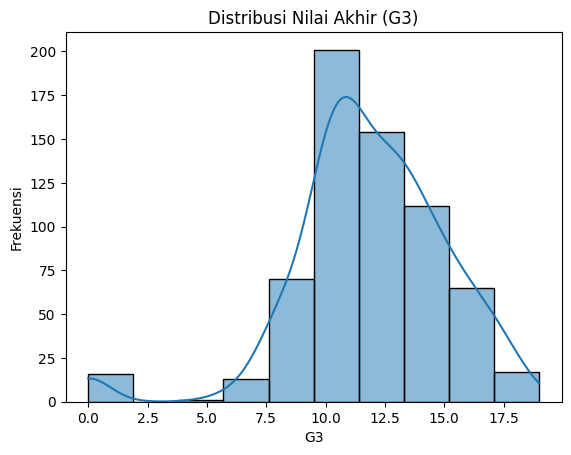

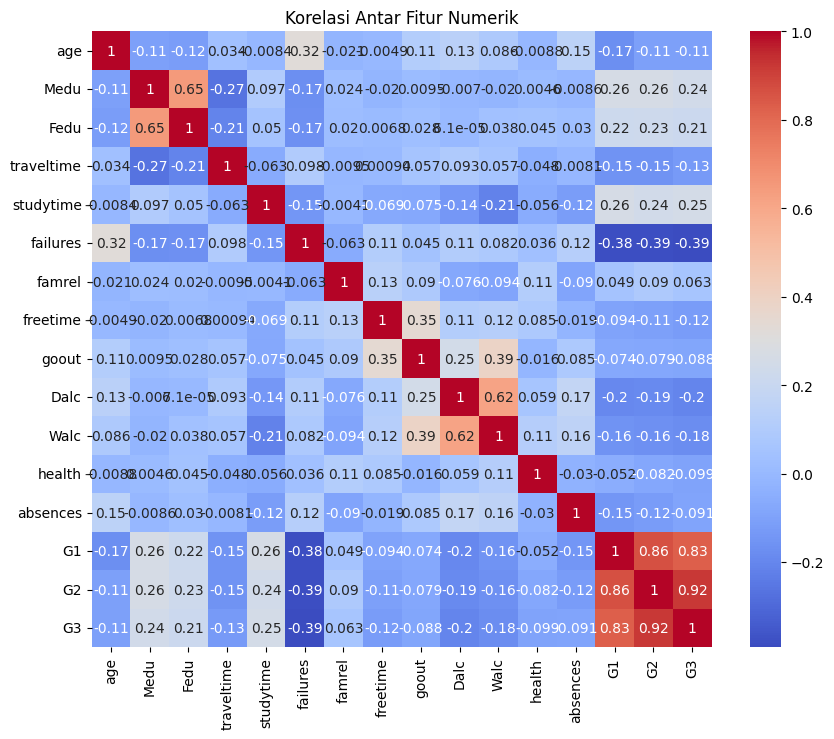

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi nilai target (G3)
sns.histplot(df['G3'], kde=True, bins=10)
plt.title("Distribusi Nilai Akhir (G3)")
plt.xlabel("G3")
plt.ylabel("Frekuensi")
plt.show()

# Korelasi antar fitur numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


In [5]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


### Feature Engineering

Proses memodifikasi atau membuat fitur baru untuk meningkatkan performa model.

In [6]:
# Konversi kolom kategorikal menjadi kategori
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# One-hot encoding untuk kolom kategorikal
df = pd.get_dummies(df, drop_first=True)

print("\nData Setelah Feature Engineering:")
print(df.head())



Data Setelah Feature Engineering:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes

### Data Normalization/Standardization

Menormalkan atau menstandarisasi fitur numerik agar memiliki skala yang seragam.

In [7]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData Setelah Normalisasi:")
print(df.head())



Data Setelah Normalisasi:
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.031695  1.310216  1.540715    0.576718   0.083653 -0.374305  0.072606   
1  0.210137 -1.336039 -1.188832   -0.760032   0.083653 -0.374305  1.119748   
2 -1.432980 -1.336039 -1.188832   -0.760032   0.083653 -0.374305  0.072606   
3 -1.432980  1.310216 -0.278983   -0.760032   1.290114 -0.374305 -0.974536   
4 -0.611422  0.428131  0.630866   -0.760032   0.083653 -0.374305  0.072606   

   freetime     goout      Dalc  ...  guardian_mother  guardian_other  \
0 -0.171647  0.693785 -0.543555  ...             True           False   
1 -0.171647 -0.157380 -0.543555  ...            False           False   
2 -0.171647 -1.008546  0.538553  ...             True           False   
3 -1.123771 -1.008546 -0.543555  ...             True           False   
4 -0.171647 -1.008546 -0.543555  ...            False           False   

   schoolsup_yes  famsup_yes  paid_yes  activities_yes  nursery_y

### Data Splitting
Membagi dataset menjadi data latih (training) dan data uji (testing).

In [8]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop(columns=['G3'])  # G3 adalah target
y = df['G3']

# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Splitting:")
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")



Data Splitting:
Training Data: (519, 41)
Testing Data: (130, 41)


## Modeling


### Membangun model machine learning  Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Membuat prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi model
print("\nRandom Forest Model:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, rf_pred)}")
print(f"R² Score: {r2_score(y_test, rf_pred)}")



Random Forest Model:
Mean Squared Error (MSE): 0.149081424532541
R² Score: 0.8406858692750175


### Hyperparameter Tuning

Mencari parameter terbaik untuk model menggunakan teknik seperti GridSearchCV atau RandomizedSearchCV.

In [10]:
from sklearn.model_selection import GridSearchCV

# Parameter yang akan di-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV untuk Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("\nBest Parameters: ", grid_search.best_params_)

# Evaluasi model terbaik
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)
print("\nTuned Random Forest Model:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, best_rf_pred)}")
print(f"R² Score: {r2_score(y_test, best_rf_pred)}")



Best Parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Model:
Mean Squared Error (MSE): 0.14698454233291924
R² Score: 0.842926678053931


## Evaluasi

Visualisasi performa model untuk membandingkan prediksi dengan nilai aktual.

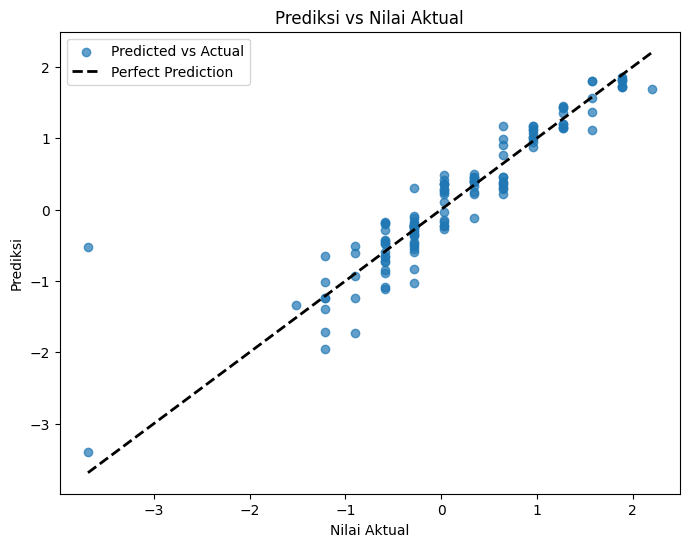

In [11]:
import matplotlib.pyplot as plt

# Visualisasi prediksi vs nilai aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_rf_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label="Perfect Prediction")
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.legend()
plt.show()


Hasil evaluasi model menunjukkan bahwa Tuned Random Forest Model memiliki performa yang cukup baik untuk memprediksi nilai akhir siswa berdasarkan data

### Feature Importance:

Identifikasi fitur mana yang paling berpengaruh pada prediksi model.

In [12]:
import pandas as pd

# Mengambil feature importance dari model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))


         Feature  Importance
14            G2    0.827512
12      absences    0.036153
13            G1    0.019005
0            age    0.009507
7       freetime    0.007880
9           Dalc    0.007197
6         famrel    0.006603
15     school_MS    0.006319
1           Medu    0.006166
29  reason_other    0.005830


Fitur yang Paling Penting:

G2 memiliki skor 0.827512, yang berarti nilai ujian kedua adalah prediktor terpenting untuk nilai akhir siswa (G3).
Artinya, siswa yang memiliki nilai baik pada G2 cenderung juga mendapatkan nilai akhir yang baik.
Fitur Lainnya:

absences (0.036153) juga memberikan kontribusi, meskipun jauh lebih kecil dibandingkan G2.
Hal ini menunjukkan bahwa kehadiran siswa (absensi) sedikit memengaruhi hasil akhir.
Fitur dengan Pengaruh Kecil:

reason_other (0.005830) memiliki pengaruh sangat kecil. Artinya, alasan siswa memilih sekolah (kategori "other") hampir tidak memengaruhi nilai akhir siswa.
Fitur Sosial atau Keluarga:

freetime (0.007880) dan famrel (0.006603) menunjukkan bahwa waktu luang dan hubungan keluarga hanya memiliki pengaruh kecil terhadap nilai akhir siswa.